# Functional Data Analysis with Monovariate Prediction
This notebook demonstrates the process of conducting a functional data analysis with a focus on monovariate prediction. It outlines the goal of the notebook, the dataset being used, and the main steps that will be taken.

In [1]:
project_root = dirname(@__DIR__)

"c:\\Users\\User\\Documents\\repos\\TESI\\tesi_data\\progetto_s_on_f.md\\b_spline\\functional-data-regression-mip"

## Setting Up the Environment
The following cells set up the environment by loading necessary libraries and defining the path to the simulation file.

In [2]:

    using RCall

    project_root = dirname(@__DIR__)
    simulation_name = "functional_data_analysis_3_pred_monovariate"
    simulation_file_path = joinpath(project_root, "simulations", simulation_name * ".R")

    @rput simulation_file_path

    R"""
    source(simulation_file_path)
    """
    

base64 binary data: G1szM20bWzFt4pSMIBtbMjJtG1szOW0bWzMzbRtbMW1XYXJuaW5nOiAbWzIybRtbMzltUkNhbGwuamw6IFdhcm5pbmc6IGlsIHBhY2NoZXR0byAncmVmdW5kJyDoIHN0YXRvIGNyZWF0byBjb24gUiB2ZXJzaW9uZSA0LjMuMgobWzMzbRtbMW3ilIIgG1syMm0bWzM5bVdhcm5pbmc6IGlsIHBhY2NoZXR0byAnZmRhJyDoIHN0YXRvIGNyZWF0byBjb24gUiB2ZXJzaW9uZSA0LjMuMgobWzMzbRtbMW3ilIIgG1syMm0bWzM5bUNhcmljYW1lbnRvIGRlbCBwYWNjaGV0dG8gcmljaGllc3RvOiBzcGxpbmVzChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IGZkcwobWzMzbRtbMW3ilIIgG1syMm0bWzM5bUNhcmljYW1lbnRvIGRlbCBwYWNjaGV0dG8gcmljaGllc3RvOiByYWluYm93ChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IHBjYVBQChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IFJDdXJsChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IGRlU29sdmUKG1szM20bWzFt4pSCIBtbMjJtG1szOW0KG1szM20bWzFt4pSCIBtbMjJtG1szOW1DYXJpY2FtZW50byBwYWNjaGV0dG86ICdmZGEnChtbMzNtG1sxbeKUgiAbWzIybRtbMzltChtbMzNtG1sxbeKUgiAbWzIybRtb

RObject{VecSxp}
$value
            bspl4.1      bspl4.2      bspl4.3      bspl4.4      bspl4.5
  [1,] 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  [2,] 9.800006e-01 1.993229e-02 6.703777e-05 7.507085e-08 0.000000e+00
  [3,] 9.602696e-01 3.946281e-02 2.669479e-04 6.005668e-07 0.000000e+00
  [4,] 9.408053e-01 5.859473e-02 5.979257e-04 2.026913e-06 0.000000e+00
  [5,] 9.216058e-01 7.733122e-02 1.058167e-03 4.804535e-06 0.000000e+00
  [6,] 9.026693e-01 9.567545e-02 1.645865e-03 9.383857e-06 0.000000e+00
  [7,] 8.839940e-01 1.136306e-01 2.359218e-03 1.621530e-05 0.000000e+00
  [8,] 8.655780e-01 1.311998e-01 3.196419e-03 2.574930e-05 0.000000e+00
  [9,] 8.474197e-01 1.483862e-01 4.155665e-03 3.843628e-05 0.000000e+00
 [10,] 8.295170e-01 1.651931e-01 5.235149e-03 5.472665e-05 0.000000e+00
 [11,] 8.118683e-01 1.816235e-01 6.433068e-03 7.507085e-05 0.000000e+00
 [12,] 7.944717e-01 1.976807e-01 7.747617e-03 9.991931e-05 0.000000e+00
 [13,] 7.773255e-01 2.133678e-01 9.176992

## Load Data and Run R Simulation
Here we load the data required for the simulation and run the R simulation script to prepare the data for analysis.

In [8]:

R"""

Z <- array(Z, dim = c(params$observations, params$predictors, params$basis_functions))

"""
# grab the outputs from the R script

# Sample input data
n = Int(rcopy(R"params$observations"))
p = Int(rcopy(R"params$predictors"))
r = Int(rcopy(R"params$basis_functions"))
t = Int(rcopy(R"params$measurements"))
tb =Int(rcopy(R"params$basis_measurements"))

# betas and basis
beta_matrix = rcopy(R"B")
basis_obj = rcopy(R"basis_obj")
basis_values = rcopy(R"basis_values")

# matrixes 
Y = rcopy(R"Y")
Z = rcopy(R"Z")
J = rcopy(R"J")
W = rcopy(R"W")


500×3×5 Array{Float64, 3}:
[:, :, 1] =
 -0.39517    0.565109  -0.861847
  2.50034    1.83287    0.68328
 -0.960979  -1.57548    1.79309
  0.388588  -2.22161   -2.19316
 -0.730199  -0.249347   0.518533
 -0.569769  -3.15318   -0.631555
 -0.548114   4.90777    2.02989
  4.251     -1.73416   -1.35655
 -3.56211   -2.56188   -0.0520675
  0.22966   -1.20496   -0.231457
 -1.03559    0.887208   0.0855117
  5.15131    2.56853    1.35868
 -2.49879   -1.25579    2.73876
  ⋮                    
 -0.873166  -3.48842   -4.05774
  0.959177   0.234699   0.861674
 -2.69376   -0.328155   0.293195
  2.38901    2.32623   -0.948477
  0.426726   1.9752     1.63577
 -0.263183  -3.58592    0.384078
  0.856405   1.7302     0.578324
 -0.739168   0.743468   1.14628
  1.77651   -1.58249    2.38072
 -2.06667    3.93033    1.70584
  1.56043   -4.41463   -2.30643
 -0.617339   1.70579    1.56705

[:, :, 2] =
  1.79695    -0.657945    0.512018
  0.049546    0.299668    2.46342
  1.27406     2.13699     2.79486
 -4.177 

## Plotting Inputs
Visualize the input data to understand its distribution and structure before running the model.

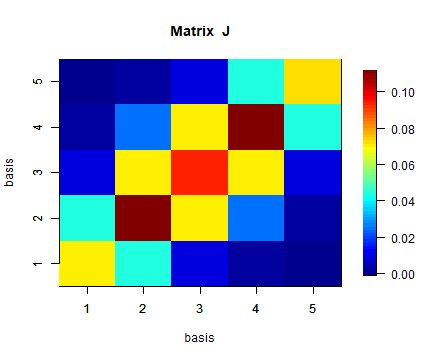

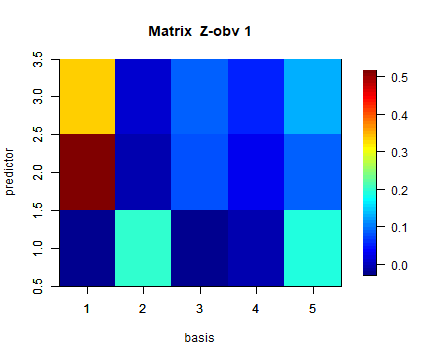

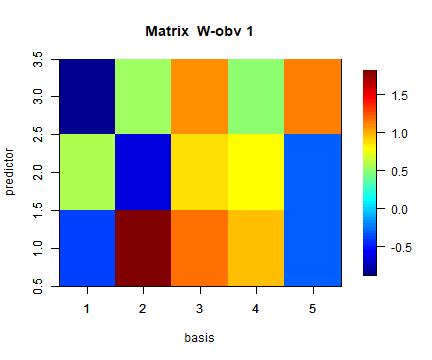

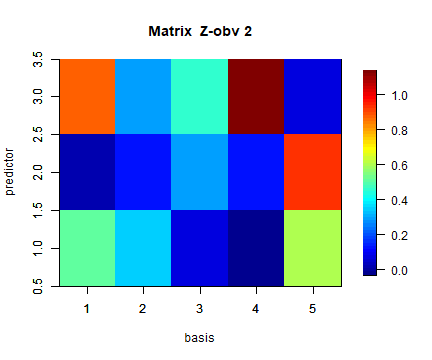

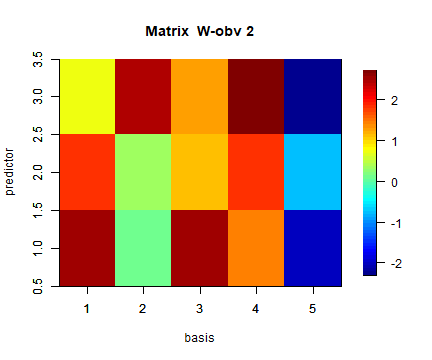

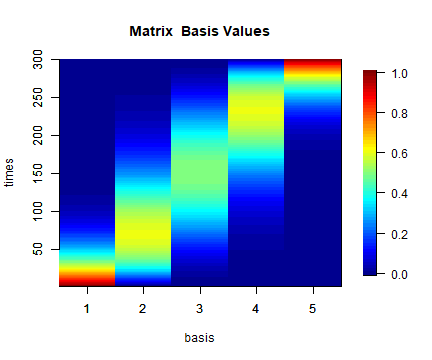

RObject{RealSxp}
[1] 1 2 3 4 5


In [10]:
using RCall

R"""
source(here("src", "R", "data_simulator","utils", "plot_utilities.R"))

plot_design_matrix(     J, "J", "basis","basis")
# #loop over the rows of Z in R code
for( i in 1:2 ) {
    plot_design_matrix(Z[i,,], paste("Z-obv",i),"basis", "predictor")
    plot_design_matrix(W[i, ,], paste("W-obv",i),"basis", "predictor")
}
plot_design_matrix(basis_values[,], "Basis Values", "basis","times")

"""

## Model Execution
Run the predictive model using the prepared data.

In [11]:
project_root = dirname(@__DIR__)
model_name = "l0_and_limit_refined.jl"
model_file_path = joinpath(project_root, "src", "Julia","models", model_name)

include(model_file_path)


mip_functional_regression (generic function with 2 methods)

In [12]:
lambda =0.1
lambda_group = 10
M = 1000

beta_star, alpha_star, group = mip_functional_regression(Y, Z, lambda,lambda_group, M)


Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-22
Set parameter TimeLimit to value 60
Set parameter Presolve to value 2
Set parameter Heuristics to value 0.5
Set parameter MIPGap to value 0.05
Set parameter Threads to value 1
Set parameter MIPFocus to value 1
Set parameter NumericFocus to value 1
Set parameter NonConvex to value 2
Set parameter OptimalityTol to value 0.01
Set parameter IntFeasTol to value 1e-06
Set parameter Threads to value 1
Set parameter TimeLimit to value 60
Set parameter NumericFocus to value 1
Set parameter MIPFocus to value 1
Set parameter Heuristics to value 0.5
Set parameter MIPGap to value 0.05
Set parameter OptimalityTol to value 0.01
Set parameter IntFeasTol to value 1e-06
Set parameter NonConvex to value 2
Set parameter Presolve to value 2
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 log

([1.4386527528212356 1.7003228171273745 … 3.3280490791603685 4.006881877940727; 0.03255763052095118 0.33162524541232824 … 1.625556499064126 2.003584627754175; 0.0 0.0 … 0.0 0.0], [1 1 … 1 1; 1 1 … 1 1; 0 0 … 0 0], [1, 1, 0])

## Model Results
Display the results of the model, including the estimated beta coefficients.

In [13]:
group

3-element Vector{Int64}:
 1
 1
 0

In [14]:
beta_matrix # true beta

3×5 Matrix{Float64}:
 1.47142      1.71648   2.32533   3.33232  3.99973
 9.99201e-16  0.332219  0.998885  1.66555  2.0
 0.0          0.0       0.0       0.0      0.0

In [15]:
beta_star  # estimated beta

3×5 Matrix{Float64}:
 1.43865    1.70032   2.35603   3.32805  4.00688
 0.0325576  0.331625  0.996755  1.62556  2.00358
 0.0        0.0       0.0       0.0      0.0

## Data Comparison
Compare the true beta matrix with the estimated beta matrix and calculate errors.

In [16]:
using DataFrames

# Ensure beta_matrix and beta_star have the same dimensions
if size(beta_matrix) != size(beta_star)
    error("beta_matrix and beta_star must have the same dimensions")
end

# Create a DataFrame and combine beta_matrix and beta_star with appropriate names
df = DataFrame()
for i in 1:size(beta_matrix, 2)
    beta_col = Symbol("beta_$i")
    beta_star_col = Symbol("beta_star_$i")
    percent_error_col = Symbol("%_err_$i")
    df[!, beta_col] = beta_matrix[:, i]
    df[!, beta_star_col] = beta_star[:, i]

    # Calculate the percentage error while handling division by zero, using NaN to represent undefined values
    df[!, percent_error_col] = ifelse.(
        df[!, beta_col] .== 0,
        0, # Could use `missing` or another value if NaN is not suitable
        round.(((df[!, beta_star_col] .- df[!, beta_col]) ./ df[!, beta_col]) .* 100, digits = 2)
    )
end

# Show the DataFrame
display(df)


Row,beta_1,beta_star_1,%_err_1,beta_2,beta_star_2,%_err_2,beta_3,beta_star_3,%_err_3,beta_4,beta_star_4,%_err_4,beta_5,beta_star_5,%_err_5
,Float64,Float64,Real,Float64,Float64,Real,Float64,Float64,Real,Float64,Float64,Real,Float64,Float64,Real
1,1.47142,1.43865,-2.23,1.71648,1.70032,-0.94,2.32533,2.35603,1.32,3.33232,3.32805,-0.13,3.99973,4.00688,0.18
2,9.99201e-16,0.0325576,3.25837e15,0.332219,0.331625,-0.18,0.998885,0.996755,-0.21,1.66555,1.62556,-2.4,2.0,2.00358,0.18
3,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0


## Evaluate Model Performance
Evaluate the model's performance using various metrics such as MSE, RMSE, MAE, and relative error.

In [17]:
using Statistics 
using LinearAlgebra

# Compute the difference between gamma_matrix and gamma_star
diff_matrix = beta_matrix - beta_star

# Evaluation Metrics
mse = sum((diff_matrix).^2) / length(beta_star)  # Mean Squared Error
rmse = sqrt(mse)                                  # Root Mean Squared Error
mae = sum(abs.(diff_matrix)) / length(beta_star)  # Mean Absolute Error
relative_error = norm(diff_matrix) / norm(beta_star)  # Relative Error

# Print or use the evaluation metrics as needed
println("Mean Squared Error (MSE): $mse")
println("Root Mean Squared Error (RMSE): $rmse")
println("Mean Absolute Error (MAE): $mae")
println("Relative Error: $relative_error")


Mean Squared Error (MSE): 0.0003349485572523557
Root Mean Squared Error (RMSE): 0.018301599854995073
Mean Absolute Error (MAE): 0.01132710173524591
Relative Error: 0.010519311643255192


## Prediction and Evaluation
Make predictions using the estimated coefficients and evaluate the model's accuracy.

In [18]:
using Statistics

# Function to obtain predictions using the estimated coefficients
function get_predictions(X_coeff, gamma_star, alpha_star)
    n, p, r = size(X_coeff)
    _, r_star = size(gamma_star) # get the actual size of gamma_star

    predictions = zeros(n)
    for i in 1:n
        prediction = 0
        for j in 1:p
            for k in 1:min(r, r_star)  # use the smaller of r and r_star
                prediction += X_coeff[i, j, k] * gamma_star[j, k]
            end
        end
        predictions[i] = prediction
    end

    return predictions
end

# Evaluation metrics
function evaluate(Y_true, Y_pred)
    n = length(Y_true)
    mse = sum((Y_true[i] - Y_pred[i])^2 for i in 1:n) / n
    mae = sum(abs(Y_true[i] - Y_pred[i]) for i in 1:n) / n
    r2 = 1 - mse / var(Y_true)

    return mse, mae, r2
end

# Get predictions
Y_pred = get_predictions( Z, beta_star, alpha_star)

# Evaluate the model
mse, mae, r2 = evaluate(Y, Y_pred)

println("MSE: $mse, MAE: $mae, R2: $r2")



MSE: 0.23817534092702994, MAE: 0.39686125485056434, R2: 0.9999988485802025


## Residual Analysis
Analyze the residuals from the model to check for any patterns that might suggest issues with the model.

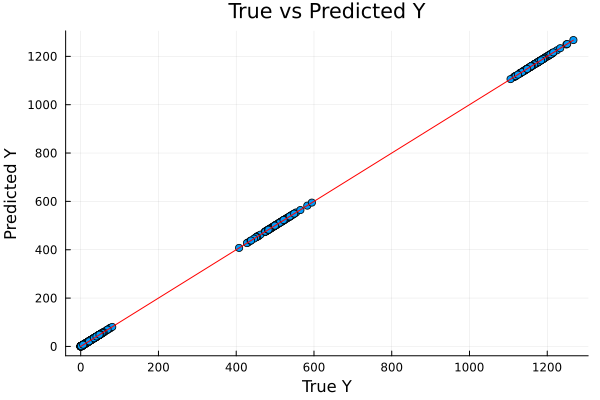

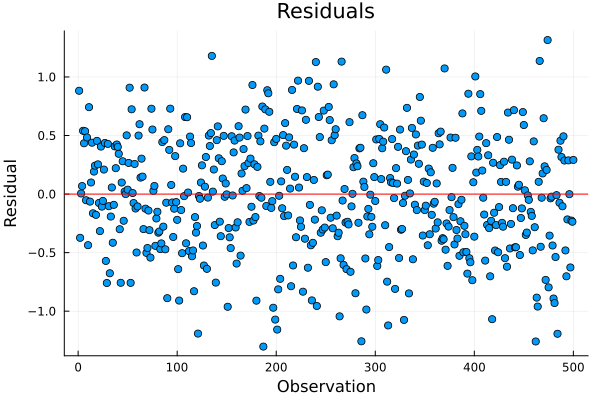

In [19]:
using Plots


# 1. Scatter plot comparing true vs predicted values
scatter(Y, Y_pred, xlabel="True Y", ylabel="Predicted Y", legend=false, title="True vs Predicted Y")
plot!(Y, Y, color=:red)  # A y=x line for reference
display(plot!())

# 2. Plot residuals
residuals = Y - Y_pred
scatter(1:n, residuals, xlabel="Observation", ylabel="Residual", legend=false, title="Residuals")
hline!([0], color=:red, label="Zero line")
display(plot!())


## Final Output
Plot the combined predicted curve and save the output for further analysis.

In [20]:
project_root = dirname(@__DIR__)
plot_file_path = joinpath(project_root, "src", "Julia","utils", "plot.jl")

include(plot_file_path)

output_folder= joinpath(project_root, "outputs", "plots", simulation_name)

plot_combined_predicted_curve(beta_matrix, beta_star,basis_values, p, r, tb,output_folder)
